<a href="https://colab.research.google.com/github/purvimisal/TS-wave/blob/master/TimeSeries_Wave_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/purvimisal/TS-wave/master/dataset/xyzZDisplacement-less.csv', names=['Time', 'ZDisplacement'])

UTC measurement times calculated as **xyzStartTime + arrayIndex/xyzSampleRate - xyzFilterDelay** 

where arrayIndex is the displacement array index starting from 0

In [ ]:
startdate = '2018-07-25T18:00:00.000000000'  #xyzStartTime
samplerate = 1.27999997
FilterDelay = 133.300003 

In [ ]:
startdate = pd.to_datetime(startdate)
startdate

Timestamp('2018-07-25 18:00:00')

In [ ]:
df['TimeStamp'] = pd.to_datetime(startdate + pd.to_timedelta(((df['Time']/samplerate)-FilterDelay), unit='s'))

In [ ]:
df.head()

,Time,ZDisplacement,TimeStamp
NaN,0,0.59,2018-07-25 17:57:46.699997000
0.0,1,0.57,2018-07-25 17:57:47.481247018
1.0,2,0.47,2018-07-25 17:57:48.262497037
2.0,3,0.46,2018-07-25 17:57:49.043747055
3.0,4,0.34,2018-07-25 17:57:49.824997073


In [ ]:
df.tail()

,Time,ZDisplacement,TimeStamp
99995.0,99996,-0.05,2018-07-26 15:39:48.576827981
99996.0,99997,0.20,2018-07-26 15:39:49.358078000
99997.0,99998,0.37,2018-07-26 15:39:50.139328018
99998.0,99999,0.34,2018-07-26 15:39:50.920578036
99999.0,100000,0.16,2018-07-26 15:39:51.701828055


In [ ]:
fig = px.line(df[:1000], x='Time', y='ZDisplacement', title='Time vs Displacement ')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1h", step="hour", stepmode="backward"),
            dict(count=2, label="3h", step="hour", stepmode="backward"),
            dict(count=3, label="5h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
df=df.set_index('TimeStamp')

In [ ]:
df.drop(['Time'], axis=1)

,ZDisplacement
TimeStamp,
2018-07-25 17:57:46.699997000,0.59
2018-07-25 17:57:47.481247018,0.57
2018-07-25 17:57:48.262497037,0.47
2018-07-25 17:57:49.043747055,0.46
2018-07-25 17:57:49.824997073,0.34
...,...
2018-07-26 15:39:48.576827981,-0.05
2018-07-26 15:39:49.358078000,0.20
2018-07-26 15:39:50.139328018,0.37


In [ ]:
fig = px.line(df[:100], x='Time', y='ZDisplacement', title='Time vs Z Displacement (only 2000 observations) ')

fig.update_xaxes(
    rangeslider_visible=True,
    # rangeselector=dict(
    #     buttons=list([
    #         dict(count=1, label="1h", step="hour", stepmode="backward"),
    #         dict(count=2, label="3h", step="hour", stepmode="backward"),
    #         dict(count=3, label="5h", step="hour", stepmode="backward"),
    #         dict(step="all")
    #     ])
    # )
)
fig.show()

In [ ]:
newdf = df[:1000] #considering only 2000 points now

In [ ]:
newdf

,Time,ZDisplacement
TimeStamp,,
2018-07-25 17:57:46.699997000,0,0.59
2018-07-25 17:57:47.481247018,1,0.57
2018-07-25 17:57:48.262497037,2,0.47
2018-07-25 17:57:49.043747055,3,0.46
2018-07-25 17:57:49.824997073,4,0.34
...,...,...
2018-07-25 18:10:44.043765219,995,0.33
2018-07-25 18:10:44.825015237,996,0.33
2018-07-25 18:10:45.606265256,997,0.32


In [ ]:
newdf = newdf.drop(['Time'], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff12e0aa460>],
      dtype=object)

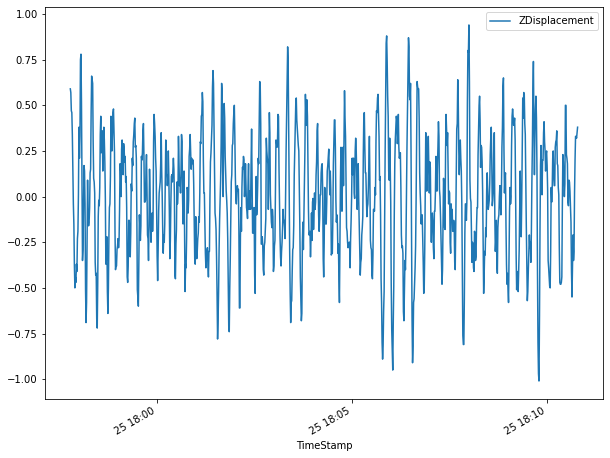

In [ ]:
newdf.plot(subplots=True)

In [ ]:
print ("Rows     : " ,newdf.shape[0])
print ("Columns  : " ,newdf.shape[1])
print ("\nFeatures : \n" ,newdf.columns.tolist())
print ("\nMissing values :  ", newdf.isnull().any())
print ("\nUnique values :  \n",newdf.nunique())

Rows     :  1000
Columns  :  1

Features : 
 ['ZDisplacement']

Missing values :   ZDisplacement    False
dtype: bool

Unique values :  
 ZDisplacement    157
dtype: int64


# Predicting 10 steps ahead using statsmodels

In [ ]:

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
# from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
data = newdf[:990]
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
data

,ZDisplacement
TimeStamp,
2018-07-25 17:57:46.699997000,0.59
2018-07-25 17:57:47.481247018,0.57
2018-07-25 17:57:48.262497037,0.47
2018-07-25 17:57:49.043747055,0.46
2018-07-25 17:57:49.824997073,0.34
...,...
2018-07-25 18:10:36.231265036,-0.05
2018-07-25 18:10:37.012515054,-0.14
2018-07-25 18:10:37.793765073,-0.41


In [ ]:
newdf.shape

(1000, 1)

In [ ]:
test=newdf[(newdf.index.get_level_values(0) > '2018-07-25 18:10:39.356265109')]

In [ ]:
test.shape

(10, 1)

In [ ]:
test['Prediction'] = np.nan

<ipython-input-170-5804783da334>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in range(10):
    yhat = model_fit.predict(len(data), len(data)+i)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beg

In [ ]:
yhat = pd.DataFrame({'TimeStamp':yhat.index, 'Prediction':yhat.values})

In [ ]:
data

,ZDisplacement
TimeStamp,
2018-07-25 17:57:46.699997000,0.59
2018-07-25 17:57:47.481247018,0.57
2018-07-25 17:57:48.262497037,0.47
2018-07-25 17:57:49.043747055,0.46
2018-07-25 17:57:49.824997073,0.34
...,...
2018-07-25 18:10:36.231265036,-0.05
2018-07-25 18:10:37.012515054,-0.14
2018-07-25 18:10:37.793765073,-0.41


In [ ]:
lis = list(yhat['Prediction'])

In [ ]:
forecast_df = pd.DataFrame(lis,index = test.index,columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
TimeStamp,
2018-07-25 18:10:40.137515127,-0.326012
2018-07-25 18:10:40.918765146,-0.279816
2018-07-25 18:10:41.700015164,-0.240289
2018-07-25 18:10:42.481265182,-0.206467
2018-07-25 18:10:43.262515200,-0.177526
2018-07-25 18:10:44.043765219,-0.152763
2018-07-25 18:10:44.825015237,-0.131575
2018-07-25 18:10:45.606265256,-0.113444
2018-07-25 18:10:46.387515274,-0.097931


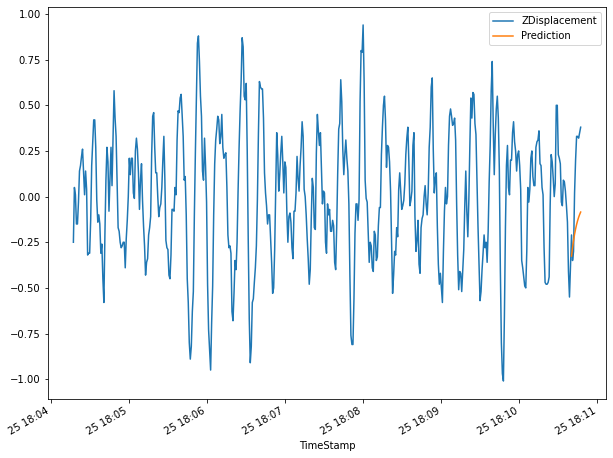

In [ ]:
pd.concat([newdf['ZDisplacement'][500:],forecast_df],axis=1).plot()

# Predicting 30 steps ahead using statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
# from random import random
# contrived dataset
# data = [x + random() for x in range(1, 100)]
data = newdf[:970]
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
data

,ZDisplacement
TimeStamp,
2018-07-25 17:57:46.699997000,0.59
2018-07-25 17:57:47.481247018,0.57
2018-07-25 17:57:48.262497037,0.47
2018-07-25 17:57:49.043747055,0.46
2018-07-25 17:57:49.824997073,0.34
...,...
2018-07-25 18:10:20.606264670,-0.48
2018-07-25 18:10:21.387514688,-0.48
2018-07-25 18:10:22.168764706,-0.47


In [ ]:
test=newdf[(newdf.index.get_level_values(0) > '2018-07-25 18:10:23.731264743')]

In [ ]:
for i in range(30):
    yhat = model_fit.predict(len(data), len(data)+i)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beg

In [ ]:
yhat = pd.DataFrame({'TimeStamp':yhat.index, 'Prediction':yhat.values})
lis = list(yhat['Prediction'])

In [ ]:
forecast_df = pd.DataFrame(lis,index = test.index,columns=['Prediction'])

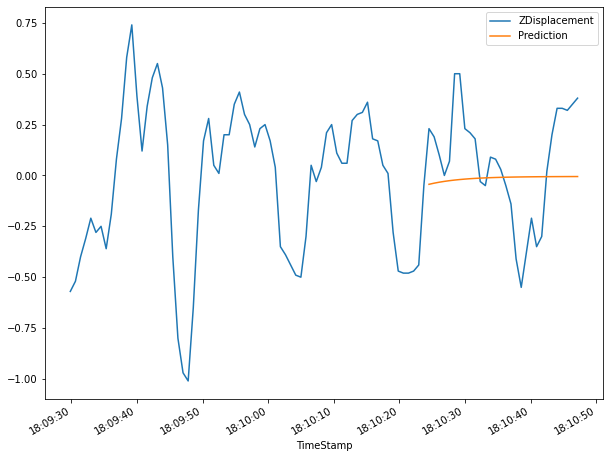

In [ ]:
pd.concat([newdf['ZDisplacement'][900:],forecast_df],axis=1).plot()

# Autoregression Models

In [ ]:
df = df.drop(['Time'],axis=1)

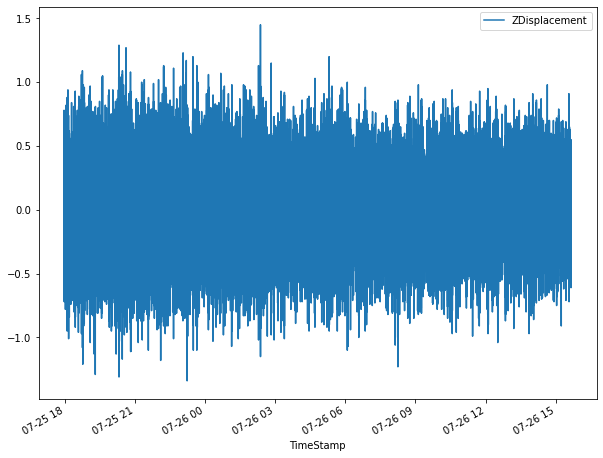

In [ ]:
df.plot()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

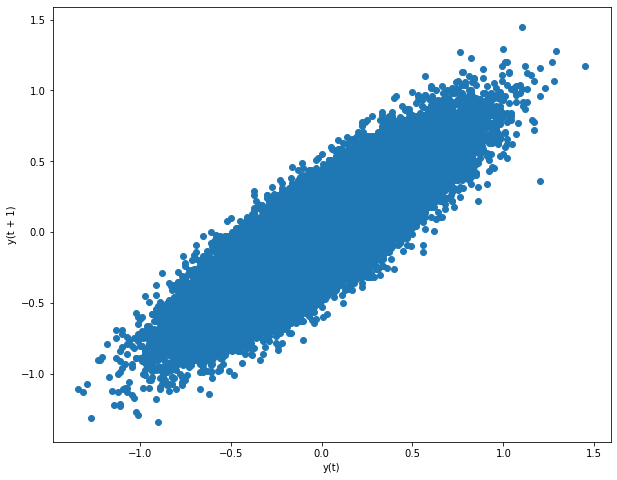

In [ ]:
lag_plot(df)
pyplot.show()  # large correlation

In [ ]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result) # Show positive correlation of .86 and lag=1 value

          t-1       t+1
t-1  1.000000  0.868204
t+1  0.868204  1.000000


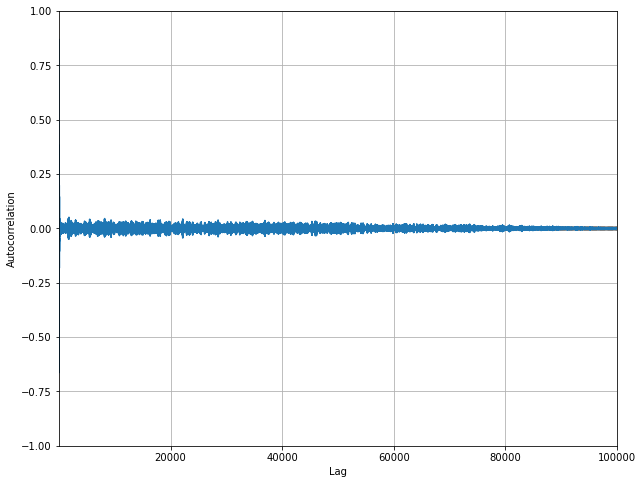

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.show()

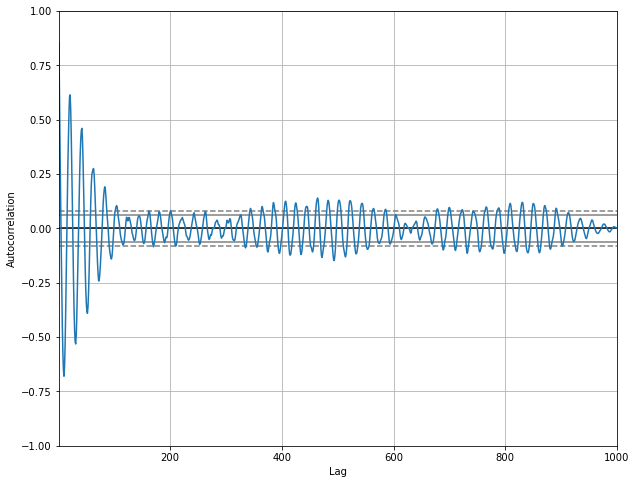

In [ ]:
autocorrelation_plot(df[:1000])
pyplot.show()

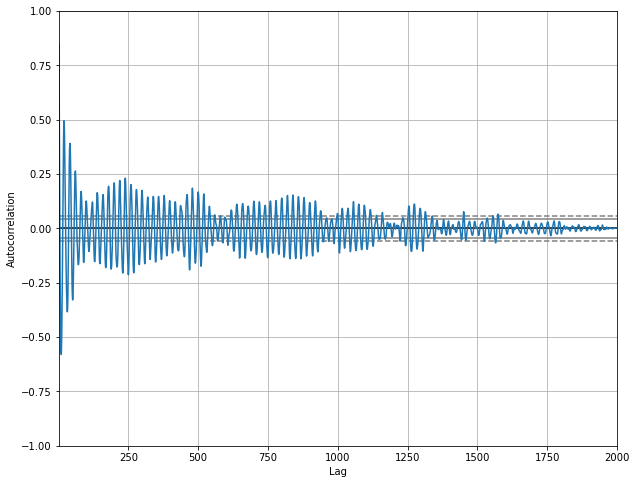

In [ ]:
autocorrelation_plot(df[22000:24000])
pyplot.show()

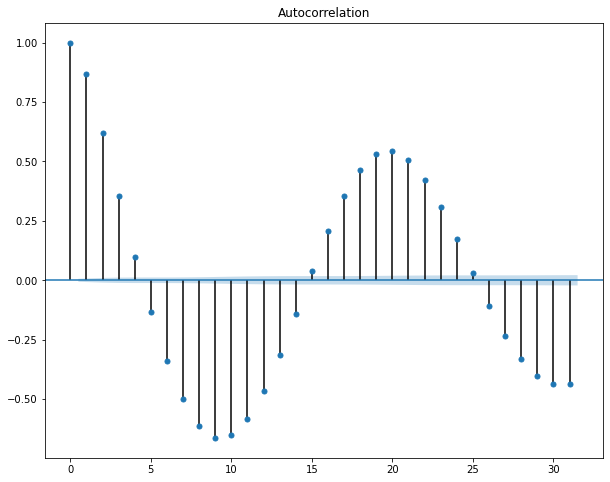

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=31)
pyplot.show()  # Autocorrelation plot

Test MSE: 0.020


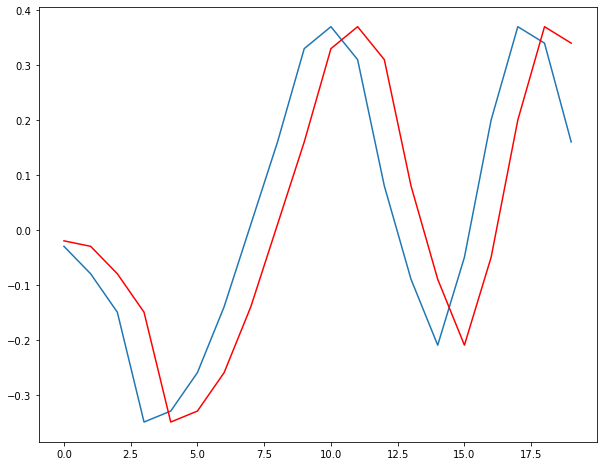

In [ ]:
# Establish baseline performance
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = df
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-20], X[len(X)-20:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
series.head()

,ZDisplacement
TimeStamp,
2018-07-25 17:57:46.699997000,0.59
2018-07-25 17:57:47.481247018,0.57
2018-07-25 17:57:48.262497037,0.47
2018-07-25 17:57:49.043747055,0.46
2018-07-25 17:57:49.824997073,0.34


In [ ]:
series.tail()

,ZDisplacement
TimeStamp,
2018-07-26 15:39:48.576827981,-0.05
2018-07-26 15:39:49.358078000,0.20
2018-07-26 15:39:50.139328018,0.37
2018-07-26 15:39:50.920578036,0.34
2018-07-26 15:39:51.701828055,0.16


 ## An autoregression model is a linear regression model that uses lagged variables as input variables.

Coefficients: [ 7.84459689e-05  1.02441259e+00 -8.42495252e-01  4.06452608e-01
 -6.30878269e-01  2.97441706e-01 -6.29911014e-01  2.65285328e-01
 -6.96506255e-01  2.73791606e-01 -7.15277461e-01  2.63678619e-01
 -7.18724576e-01  2.47735808e-01 -6.92820754e-01  2.41685620e-01
 -6.52738930e-01  2.30754152e-01 -5.87009335e-01  2.28723645e-01
 -5.20312936e-01  2.07756161e-01 -4.35626073e-01  1.83033575e-01
 -3.45115624e-01  1.53481501e-01 -2.56056761e-01  1.10181352e-01
 -1.26401404e-01 -3.16846531e-02]
predicted=-0.037639, expected=-0.030000
predicted=-0.074396, expected=-0.080000
predicted=-0.095365, expected=-0.150000
predicted=-0.124187, expected=-0.350000
predicted=-0.133773, expected=-0.330000
predicted=-0.136268, expected=-0.260000
predicted=-0.118204, expected=-0.140000
predicted=-0.108361, expected=0.010000
predicted=-0.084819, expected=0.160000
predicted=-0.069283, expected=0.330000
predicted=-0.027720, expected=0.370000
predicted=0.034688, expected=0.310000
predicted=0.101094, exp

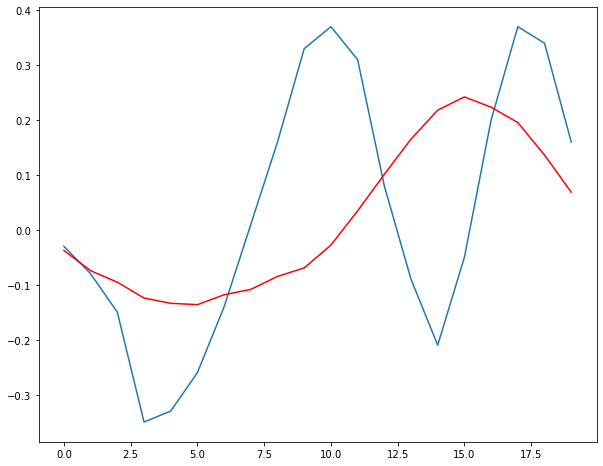

In [ ]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = df
# split dataset
X = series.values
train, test = X[1:len(X)-20], X[len(X)-20:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

One way would be to re-train the AutoReg model each day as new observations become available, and that may be a valid approach, if not computationally expensive.

predicted=-0.037639, expected=-0.030000
predicted=-0.066570, expected=-0.080000
predicted=-0.107542, expected=-0.150000
predicted=-0.172329, expected=-0.350000
predicted=-0.326167, expected=-0.330000
predicted=-0.163438, expected=-0.260000
predicted=-0.143430, expected=-0.140000
predicted=0.025564, expected=0.010000
predicted=0.088740, expected=0.160000
predicted=0.226372, expected=0.330000
predicted=0.294863, expected=0.370000
predicted=0.298304, expected=0.310000
predicted=0.178958, expected=0.080000
predicted=-0.000553, expected=-0.090000
predicted=-0.074105, expected=-0.210000
predicted=-0.128956, expected=-0.050000
predicted=0.092976, expected=0.200000
predicted=0.217988, expected=0.370000
predicted=0.281131, expected=0.340000
predicted=0.116699, expected=0.160000
Test RMSE: 0.086


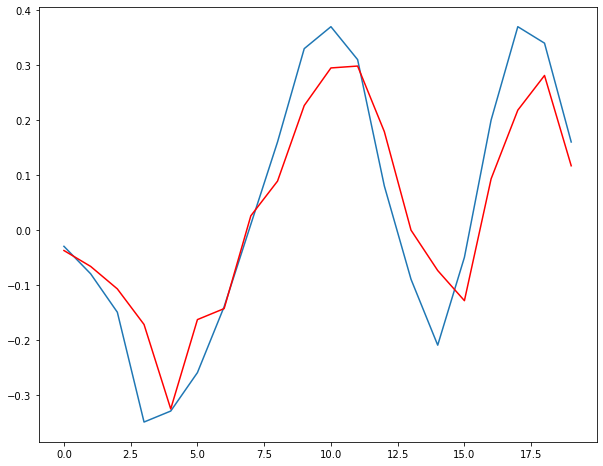

In [ ]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = df
# split dataset
X = series.values
train, test = X[1:len(X)-20], X[len(X)-20:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()